<a href="https://colab.research.google.com/github/prokwas/T1_task_8/blob/main/mlflow_models_task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Создайте новый Git-репозиторий

2) Загрузите датасет, который будете использовать для модели,

3) Сконфигурируйте DVC для логирования метрик и гиперпараметров каждого эксперимента.

4) С помощью DVC сравните результаты нескольких экспериментов.

5) Сохраните обученную модель в формате MLflow.

6) Напишите код, который загружает модель из MLflow и выполняет предсказания.

**Ссылка на репозиторий:**

https://github.com/prokwas/T1_task_8/tree/main

In [1]:
!pip install pyngrok --quiet

In [2]:
!pip install mlflow --quiet
get_ipython().system_raw("mlflow ui --port 5000 &")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00


In [3]:
# import subprocess
from pyngrok import ngrok, conf
from pyngrok import ngrok
import getpass
import mlflow

In [4]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken
# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken   IMPORTANT !!!
NGROK_AUTH_TOKEN = getpass.getpass()

ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

··········
MLflow Tracking UI: https://c490-34-172-241-19.ngrok-free.app


**TEST**

In [5]:
with mlflow.start_run(run_name="MLflow on Colab"):
    mlflow.log_metric("m1", 2.0)
    mlflow.log_param("p1", "mlflow-colab")



---



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
import sklearn.datasets
import matplotlib.pyplot as plt


In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = housing.data
df

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
# df.to_csv('fetch_california_housing.csv')

In [9]:
!git add fetch_california_housing.csv
!git commit -m 'Рассматриваемые данные '
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


MedInc median income in block group

HouseAge median house age in block group

AveRooms average number of rooms per household

AveBedrms average number of bedrooms per household

Population block group population

AveOccup average number of household members

Latitude block group latitude

Longitude block group longitude



The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

---


MedInc медианный доход в группе блоков

HouseAge медианный возраст дома в группе блоков

AveRooms среднее количество комнат на домохозяйство

AveBedrms среднее количество спален на домохозяйство

Population численность группы блоков

AveOccup среднее количество членов домохозяйства

Latitude широта группы блоков

Долгота долгота группы блоков

In [10]:
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseValue']=housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


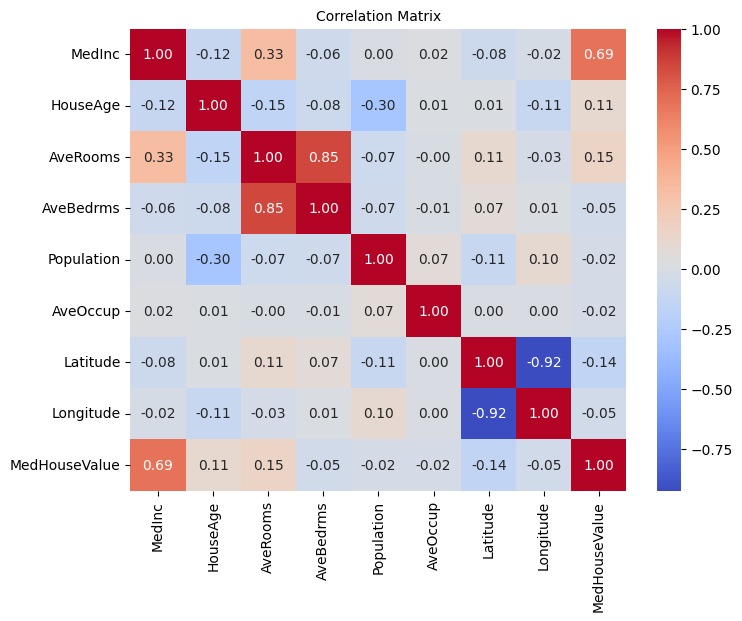

In [12]:
# Compute the correlation matrix
corr_matrix=df.corr()

fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix',fontsize=10)
plt.show()

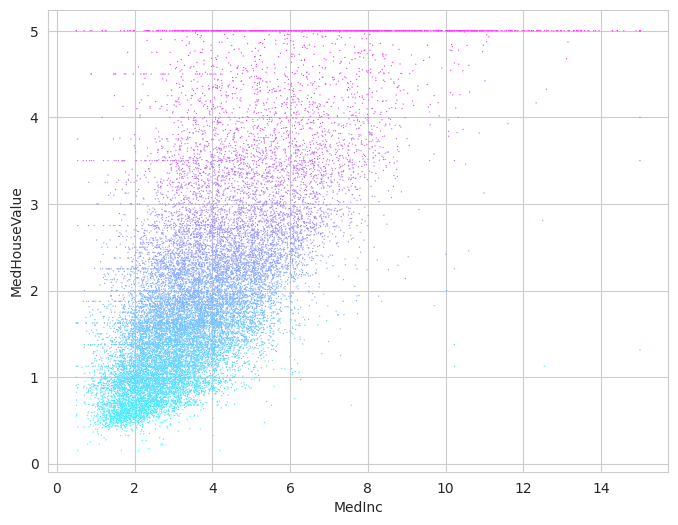

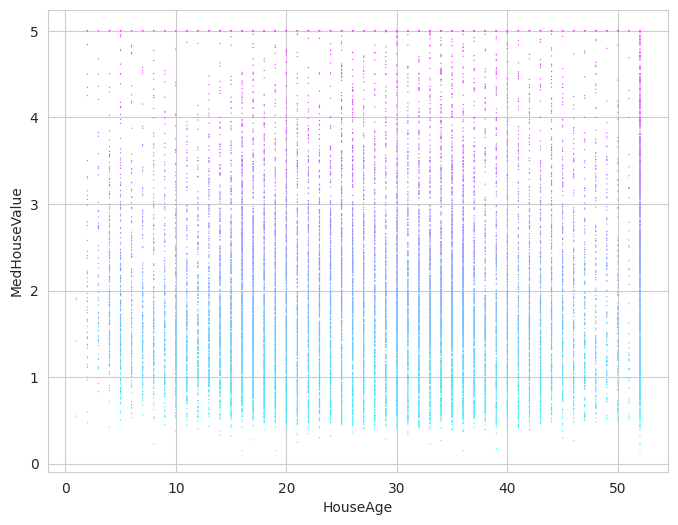

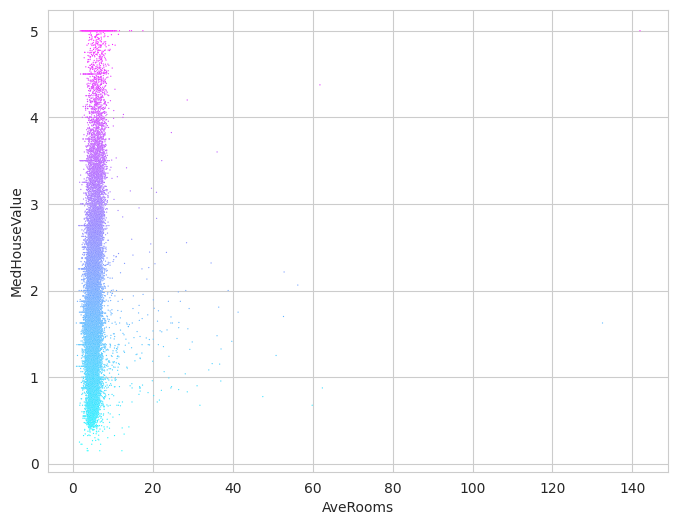

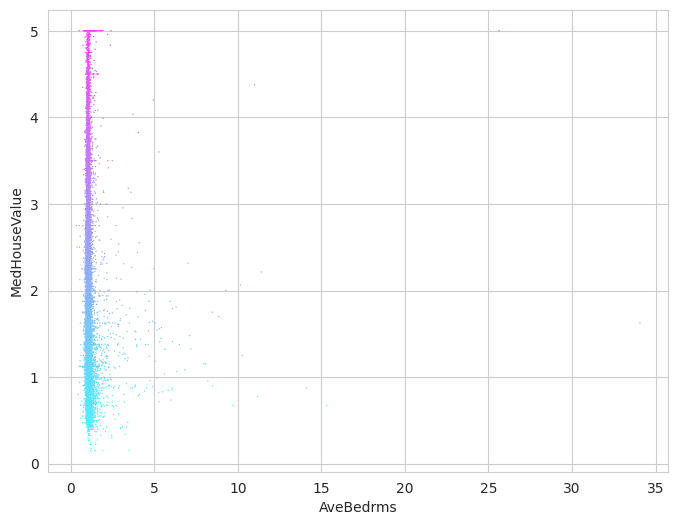

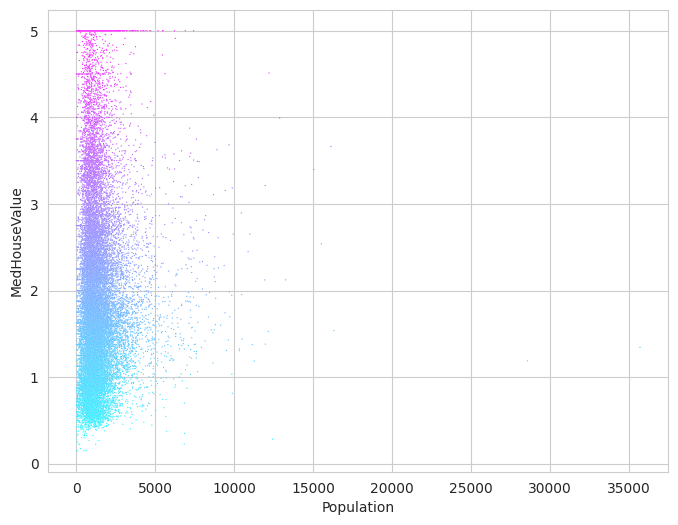

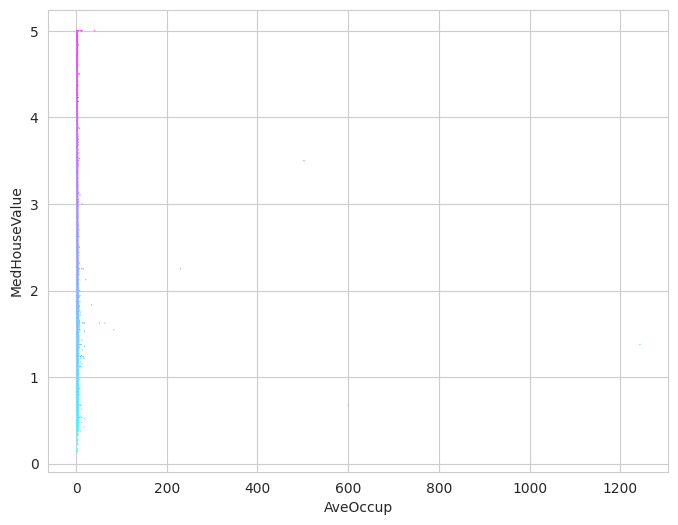

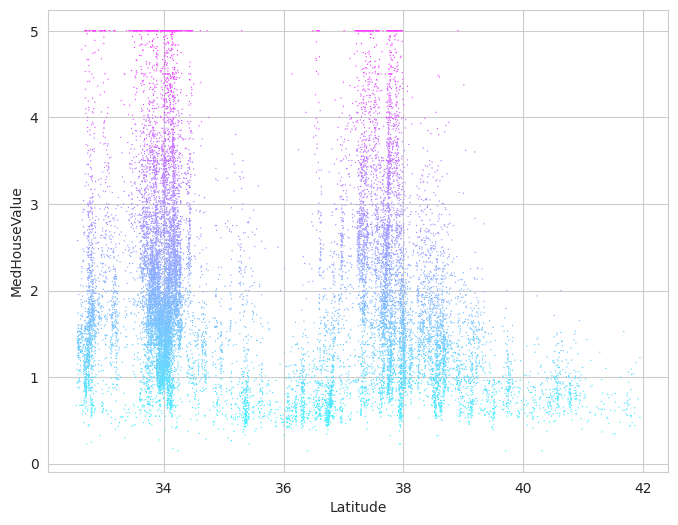

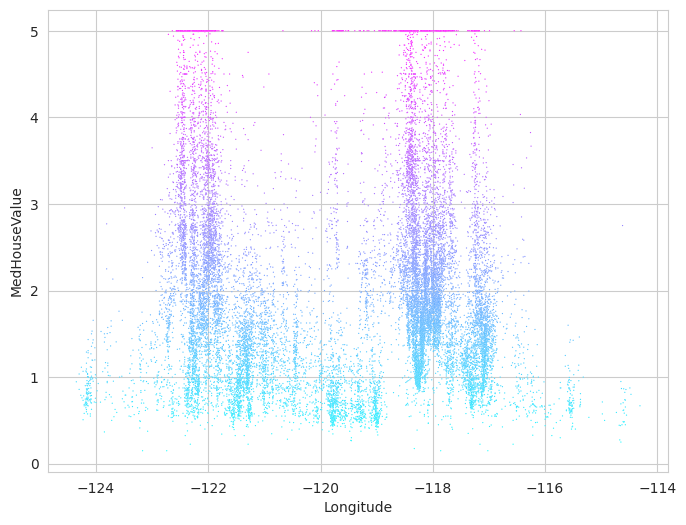

In [13]:
#using matplotlib for visualization

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in housing.feature_names:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='MedHouseValue',
                    hue='MedHouseValue', palette='cool', legend=False, s=0.8)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing.data,
                                                    housing.target,
                                                    random_state=11)
print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [15]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(housing.feature_names):
    print(f'{name}: {linear_regression.coef_[i]}')

MedInc: 0.4377030215382206
HouseAge: 0.009216834565797749
AveRooms: -0.10732526637360926
AveBedrms: 0.6117133073918087
Population: -5.756822009275742e-06
AveOccup: -0.003384566465716442
Latitude: -0.4194818609649067
Longitude: -0.4337713349874023


In [16]:
y_pred = linear_regression.predict(X_test)
expected = y_test

In [17]:
dist = np.absolute(y_test - y_pred)

Помня о том, что среднеквадратическое отклонение чувствиетльно к выбросам, посмотрим на расстояния между y_test и y_pred.

<ipython-input-18-87ba571f5161>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(dist, palette='cool', legend=False, s=4)


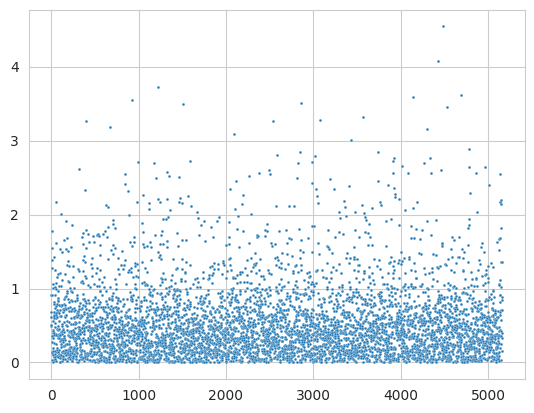

In [18]:
sns.scatterplot(dist, palette='cool', legend=False, s=4)
plt.show()

In [19]:
from sklearn import metrics
print(f'R2 score: {metrics.r2_score(expected, y_pred)}\n')
print(f'MSE: {metrics.mean_squared_error(expected, y_pred)}')

R2 score: 0.6008983115964333

MSE: 0.5350149774449117


**Работа с MLFLOW**

In [20]:
# Создаем эксперимент и указываем хранилище артефактов
expname = "Predicted_experiment"
exp_id = mlflow.create_experiment(expname)

In [21]:
exp_id

'988615779757810327'

In [22]:
def train_sklearn_model(X, y):
  linear_regression = LinearRegression()
  linear_regression.fit(X, y)
  return linear_regression

In [23]:
with mlflow.start_run(experiment_id=exp_id, run_name='n1_sklearn'):
  # Автоматически сохраняет model's parameters, metrics, artifacts
  mlflow.sklearn.autolog()
  train_sklearn_model(X_train, y_train)
  run_id_sk = mlflow.active_run().info.run_id

In [24]:
run_id_sk

'59a879ccdd6f42f79fd9e0f6078a5c24'

Создадим новую версию модели в реестре моделей для файлов моделей, указанных в model_uri.


In [25]:
# Задаем имя модели
model_name = "model_new_1"

# Стандартный путь к каталогу с моделями
artifact_path = "model"
model_uri = "runs:/{run_id}/{artifact_path}".format(run_id=run_id_sk, artifact_path=artifact_path)

model_details_sk = mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'model_new_1'.
Created version '1' of model 'model_new_1'.


**Добавим описание к модели**

In [26]:
from mlflow.tracking.client import MlflowClient
# Описание совокупности моделей
client = MlflowClient()

client.update_registered_model(
  name=model_details_sk.name,
  description="Линейная регрессия, описание для описания модели."
  )

<RegisteredModel: aliases={}, creation_timestamp=1731086297961, description='Линейная регрессия, описание для описания модели.', last_updated_timestamp=1731086297985, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1731086297966, current_stage='None', description=None, last_updated_timestamp=1731086297966, name='model_new_1', run_id='59a879ccdd6f42f79fd9e0f6078a5c24', run_link=None, source='file:///content/mlruns/988615779757810327/59a879ccdd6f42f79fd9e0f6078a5c24/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>], name='model_new_1', tags={}>

In [27]:
model_details_sk.version

1

In [28]:
# Описание версии моделей
client.update_model_version(
  name=model_details_sk.name,
  version=model_details_sk.version,
  description="Регрессия попытка 1"
)

<ModelVersion: aliases=[], creation_timestamp=1731086297966, current_stage='None', description='Регрессия попытка 1', last_updated_timestamp=1731086298011, name='model_new_1', run_id='59a879ccdd6f42f79fd9e0f6078a5c24', run_link=None, source='file:///content/mlruns/988615779757810327/59a879ccdd6f42f79fd9e0f6078a5c24/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [29]:
model_details_sk.name

'model_new_1'

In [30]:
# Изменяем ТЕГ модели
client.transition_model_version_stage(
  name=model_details_sk.name,
  version=model_details_sk.version,
  stage='Production',
)

<ipython-input-30-977bc7da0463>:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1731086297966, current_stage='Production', description='Регрессия попытка 1', last_updated_timestamp=1731086298035, name='model_new_1', run_id='59a879ccdd6f42f79fd9e0f6078a5c24', run_link=None, source='file:///content/mlruns/988615779757810327/59a879ccdd6f42f79fd9e0f6078a5c24/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [31]:
# Посмотрим на последнюю версию модели
latest_version_info = client.get_latest_versions(model_name, stages=["Production"])
latest_production_version = latest_version_info[0].version
print(f"Последняя производственная версия модели: {model_name} это {latest_production_version}")

Последняя производственная версия модели: model_new_1 это 1


<ipython-input-31-1674d8c7776c>:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_version_info = client.get_latest_versions(model_name, stages=["Production"])


In [32]:
# Изменяем ТЕГ модели
client.set_model_version_tag(
    name=model_details_sk.name,
    version=model_details_sk.version,
    key='task',
    value='regression'
)

**Загрузка модели из MLFLOW**

In [33]:
import mlflow.pyfunc

model_version_uri = "models:/{model_name}/1".format(model_name=model_details_sk.name)

print("Loading registered model version from URI: '{model_uri}'".format(model_uri=model_version_uri))
model_sk_from_mlf = mlflow.pyfunc.load_model(model_version_uri)
model_sk_from_mlf

Loading registered model version from URI: 'models:/model_new_1/1'


mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 59a879ccdd6f42f79fd9e0f6078a5c24

In [34]:
type(model_sk_from_mlf)

mlflow.pyfunc.PyFuncModel

**Проверим загруженную модель**

In [35]:
X_test.shape

(5160, 8)

In [36]:
y_predict = model_sk_from_mlf.predict(X_test)
y_predict

array([1.25396876, 2.34693107, 2.03794745, ..., 1.41376537, 1.26616891,
       1.86492088])

**Окончательно убедимся в идентичности предсказаний:**

In [37]:
all(y_predict == y_pred)

True

При регистрации моделей рекомендуется включать подпись, поскольку она обеспечивает четкие сообщения об ошибках, если входные данные некорректны, и обеспечивает совместимость с инструментами развертывания MLflow.

Используя infer_signature, специалисты по данным могут создавать более надежные и устойчивые конвейеры машинного обучения, которые четко определяют, как следует использовать модели и какие данные они ожидают.

In [38]:
from sklearn.linear_model import Ridge
from mlflow.models import infer_signature
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
mlflow.set_tracking_uri('http://localhost:5000')

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [41]:
with mlflow.start_run():
    lr = Ridge()
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    (rmse, mae, r2) = eval_metrics(y_test, predictions)
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R2: {r2}")

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    # predictions = lr.predict(X_test)
    signature = infer_signature(X_test, predictions)
    mlflow.sklearn.log_model(lr, artifact_path="model", signature=signature, input_example=X_test)

  RMSE: 0.7314533605309395
  MAE: 0.5379063923391999
  R2: 0.600891567200134


2024/11/08 17:18:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run mysterious-finch-923 at: http://localhost:5000/#/experiments/0/runs/f6373832d4f04aad804db05d97b08a15.
2024/11/08 17:18:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.
